In [1]:
#pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [61]:
import pandas as pd
import numpy as np

In [62]:
df= pd.read_csv("H:/iAnalyst/Time series/Task on electricity data/AssignmentData.csv", index_col='datetime', parse_dates= True)  #This makes sure that the pandas is dealing with date values
df= df.dropna()


In [63]:
todrop= ['Unnamed: 0','date']
df= df.drop(todrop, axis=1)

In [64]:
print(df.head())
print(df.shape)

                          load  apparent_temperature  temperature  humidity  \
datetime                                                                      
2018-01-01 00:00:00  803.22270              10.45800     10.45800  0.955500   
2018-01-01 00:15:00  774.89523              10.32675     10.32675  0.961625   
2018-01-01 00:30:00  731.46927              10.19550     10.19550  0.967750   
2018-01-01 00:45:00  713.93870              10.06425     10.06425  0.973875   
2018-01-01 01:00:00  699.23007               9.93300      9.93300  0.980000   

                     dew_point  wind_speed  cloud_cover  
datetime                                                 
2018-01-01 00:00:00   8.946000         0.0          0.0  
2018-01-01 00:15:00   8.911875         0.0          0.0  
2018-01-01 00:30:00   8.877750         0.0          0.0  
2018-01-01 00:45:00   8.843625         0.0          0.0  
2018-01-01 01:00:00   8.809500         0.0          0.0  
(101952, 7)


In [65]:
##Plot your data

In [66]:
df.columns

Index(['load', 'apparent_temperature', 'temperature', 'humidity', 'dew_point',
       'wind_speed', 'cloud_cover'],
      dtype='object')

<AxesSubplot:xlabel='datetime'>

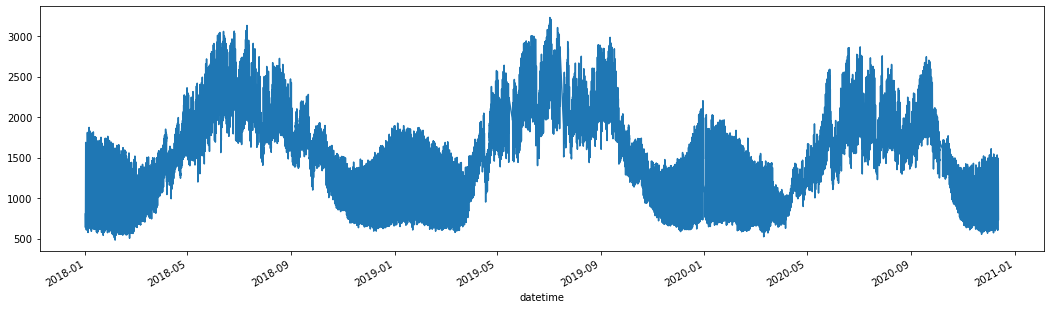

In [67]:
df['load'].plot(figsize=(18,5))  #try all the columns

In [68]:
##Check for stationarity using dickey fuller test.
# this test returns certain statistical parameters which can be used to judge if a dataset is stationary or  not.

In [69]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')   #adfuller returns array of values
    print("1. ADF : ", dftest[0])
    print("2. P-value : ", dftest[1])
    print("3. Num of lags : ", dftest[2])
    print("4. Num of observations used for ADF Regression and Critical Values Calculation : ", dftest[3])
    print("5. Critical Values : ")
    for key, val in dftest[4].items():
        print("\t", key, ":", val)

In [70]:
ad_test(df['load'])

1. ADF :  -6.155770389576914
2. P-value :  7.375145269448363e-08
3. Num of lags :  68
4. Num of observations used for ADF Regression and Critical Values Calculation :  101883
5. Critical Values : 
	 1% : -3.430414186024805
	 5% : -2.861568369223142
	 10% : -2.5667850999437674


In [71]:
## We see that the p-value is very small. This means that the dataset is stationary and we can proceed 

#Figure out order of ARIMA model.


In [72]:
from pmdarima import auto_arima
#Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [73]:
stepwise_fit = auto_arima(df['load'], trace=True, suppress_warnings= True)  #trace will print out as its iterating to each step
#auto arima will carry out all the orders like 1,0,0  0,1,0  0,1,2  etc  and for every model it will assign a score which is called AIC.
#Goal is to minimize the AIC.
#ARIMA order is named p,d,q. values are named in this order

stepwise_fit.summary()

#It looks for the minimum AIC score.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=82.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=986762.801, Time=1.58 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=911802.874, Time=2.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=947902.755, Time=11.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=986760.801, Time=0.76 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=899747.835, Time=2.47 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=898606.054, Time=3.60 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=898585.463, Time=4.74 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=898101.582, Time=5.52 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=119.28 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=113.36 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=898099.582, Time=2.66 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=898583.463, Time=2.33 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=56.40 sec
 ARIMA(4,1,1)(0,0,0)[0]   

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:               101952
Model:               SARIMAX(5, 1, 0)   Log Likelihood             -449043.791
Date:                Tue, 04 Jan 2022   AIC                         898099.582
Time:                        00:08:18   BIC                         898156.775
Sample:                             0   HQIC                        898116.924
                             - 101952                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4458      0.001    462.602      0.000       0.444       0.448
ar.L2          0.2952      0.001    232.988      0.000       0.293       0.298
ar.L3          0.1321      0.002     66.060      0.000       0.128       0.136
ar.L4          0.0159      0.003      6.358      0.000       0.011       0.021
ar.L5         -0.0690      0.002    -28.926      0.000      -0.074      -0.064
sigma2       391.9552      0.366   1069.731      0.000     391.237     392.673
===================================================================================
Ljung-Box (L1) (Q):                   2.72   Jarque-Bera (JB):           8747584.25
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               0.57   Skew:                            -0.83
Prob(H) (two-sided):                  0.00   Kurtosis:                        48.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
#We see the best model as ARIMA with order (5,1,0)

In [12]:
from statsmodels.tsa.arima_model import ARIMA

In [13]:
#Splitting the data into training and testing
#from sklearn.model_selection import train_test_split

In [15]:
print(df.shape)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)  #not using 

train= df.iloc[:-20000]
test= df.iloc[-20000:]
print(train.shape, test.shape)

(101952, 9)
(81952, 9) (20000, 9)


In [16]:
#Training the model

In [28]:
model = ARIMA(train['load'], order=(5,1,0))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.load   No. Observations:                81951
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -364231.227
Method:                       css-mle   S.D. of innovations             20.605
Date:                Mon, 03 Jan 2022   AIC                         728476.453
Time:                        23:32:57   BIC                         728541.650
Sample:                             1   HQIC                        728496.418
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0050      0.390      0.013      0.990      -0.760       0.770
ar.L1.D.load     0.4293      0.003    123.137      0.000       0.422       0.436
ar.L2.D.load     0.2913      0.004     76.779      0.000       0.284       0.299
ar.L3.D.load     0.1372      0.004     35.199      0.000       0.130       0.145
ar.L4.D.load     0.0217      0.004      5.715      0.000       0.014       0.029
ar.L5.D.load    -0.0639      0.003    -18.333      0.000      -0.071      -0.057
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.8576           -0.0000j            1.8576           -0.5000
AR.2           -0.5829           -1.7225j            1.8185           -0.3019
AR.3           -0.5829           +1.7225j            1.8185            0.3019
AR.4            1.1525           -0.0000j            1.1525           -0.0000
AR.5            2.2103           -0.0000j            2.2103           -0.0000
-----------------------------------------------------------------------------
"""

In [23]:
#Making predictions on test

In [31]:
start= len(train)
end= len(train)+len(test)-1
pred= model.predict(start= start, end= end, typ= 'levels')
#print(pred)

pred.index= df.index[start:end+1]  #index was not date before. now converted to date
print(pred)

datetime
2020-05-15 16:00:00    1440.529596
2020-05-15 16:15:00    1436.471196
2020-05-15 16:30:00    1432.679867
2020-05-15 16:45:00    1429.461466
2020-05-15 17:00:00    1426.714981
                          ...     
2020-12-12 22:45:00    1507.553065
2020-12-12 23:00:00    1507.558046
2020-12-12 23:15:00    1507.563027
2020-12-12 23:30:00    1507.568008
2020-12-12 23:45:00    1507.572989
Length: 20000, dtype: float64


<AxesSubplot:xlabel='datetime'>

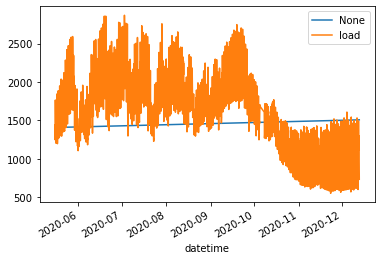

In [33]:
pred.plot(legend= True)
test['load'].plot(legend=True)

In [36]:
test['load'].mean()

1647.1741578280073

In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred, test['load']))
print(rmse)

522.7893894821441


In [ ]:
#RMSE very high. Mean of the dataset is 1647 and the avg error is 522 which is not good and it makes a bad model.

In [38]:
#Now predicting on the future dates

In [39]:
model2= ARIMA(df['load'], order= (5,1,0))
model2= model2.fit()
df.tail()

,Unnamed: 0,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,date
datetime,,,,,,,,,
2020-12-12 22:45:00,103387,858.50,17.79750,17.79750,0.756000,12.4005,1.950375,0.16275,2020-12-12
2020-12-12 23:00:00,103388,832.24,17.66100,17.66100,0.756000,12.2640,2.047500,0.14700,2020-12-12
2020-12-12 23:15:00,103389,804.97,17.46675,17.46675,0.758625,12.1275,2.144625,0.11550,2020-12-12
2020-12-12 23:30:00,103390,763.56,17.27250,17.27250,0.761250,11.9910,2.241750,0.08400,2020-12-12
2020-12-12 23:45:00,103391,734.27,17.07825,17.07825,0.763875,11.8545,2.338875,0.05250,2020-12-12


In [56]:
index_future_dates= pd.date_range(start='2020-12-14 00:00:00', end='2021-01-31 00:00:00')
#print(index_future_dates)
pred= model2.predict(start= len(df), end= len(df)+48, typ='levels').rename('ARIMA Predictions')   #enter the no. of days correctly in 'end= len(df) + no. of days)'
#print(comp_pred)
pred.index= index_future_dates
#print(comp_pred)
print(pred)

2020-12-14    707.613980
2020-12-15    682.990500
2020-12-16    661.495832
2020-12-17    643.511972
2020-12-18    627.491594
2020-12-19    613.646890
2020-12-20    601.725118
2020-12-21    591.402363
2020-12-22    582.436648
2020-12-23    574.701172
2020-12-24    568.006539
2020-12-25    562.211192
2020-12-26    557.197847
2020-12-27    552.862084
2020-12-28    549.109759
2020-12-29    545.863392
2020-12-30    543.054752
2020-12-31    540.624540
2021-01-01    538.521646
2021-01-02    536.702025
2021-01-03    535.127377
2021-01-04    533.764637
2021-01-05    532.585215
2021-01-06    531.564370
2021-01-07    530.680692
2021-01-08    529.915670
2021-01-09    529.253289
2021-01-10    528.679695
2021-01-11    528.182904
2021-01-12    527.752550
2021-01-13    527.379666
2021-01-14    527.056496
2021-01-15    526.776328
2021-01-16    526.533360
2021-01-17    526.322569
2021-01-18    526.139614
2021-01-19    525.980737
2021-01-20    525.842688
2021-01-21    525.722656
2021-01-22    525.618210


<AxesSubplot:>

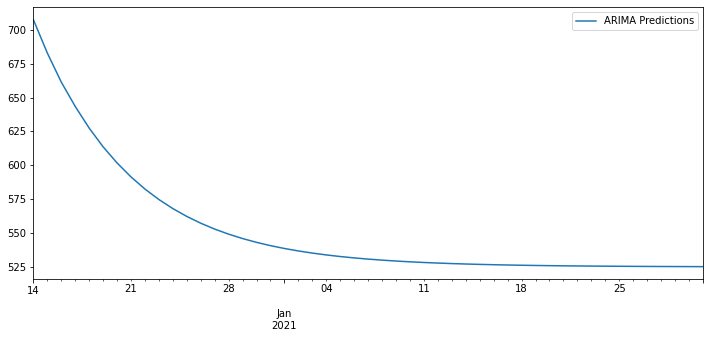

In [57]:
pred.plot(figsize=(12,5), legend=True)